In [3]:
import time
import warnings
from itertools import cycle, islice

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import cluster, datasets, metrics

from sklearn.preprocessing import MinMaxScaler

AMOSTRAS = 2000

np.random.seed(12)

circulos,_ = datasets.make_circles(n_samples=AMOSTRAS, factor=.4,noise=.07, random_state= 12)

bolinhas,_ = datasets.make_blobs(n_samples=AMOSTRAS, random_state=15)

aleatorio = np.random.rand(AMOSTRAS, 2)

X_aux, y_aux = datasets.make_blobs(n_samples=AMOSTRAS, random_state=42)
transf = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X_aux, transf)

In [4]:
from sklearn.cluster import DBSCAN

# Definindo o DBSCAN com os parâmetros especificados
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Ajustando o DBSCAN nos dados de bolinhas
dbscan.fit(bolinhas)

# Obtendo os rótulos dos clusters
labels = dbscan.labels_

# Encontrando o número de clusters (excluindo o ruído, que é rotulado como -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f'Número de clusters encontrados: {n_clusters}')


Número de clusters encontrados: 6


In [7]:
# Encontrar o número de outliers
n_outliers = np.sum(labels == -1)

print(f'Número de outliers encontrados: {n_outliers}')

Número de outliers encontrados: 170


In [8]:
# Obter os índices dos pontos core
core_sample_indices = dbscan.core_sample_indices_

# Encontrar o número de pontos core
n_core_samples = len(core_sample_indices)

print(f'Número de pontos core encontrados: {n_core_samples}')

Número de pontos core encontrados: 1750


In [9]:
def plota_dbscan(dataset, scale = True, **kargs):
    '''
    Executa um DBSCAN e plota os clusters formados.
    OBS: se os dados tiverem mais de 2 dimensões, apenas as duas primeiras serão utilizadas no gráfico!
   
    Args:
        - dataset (Numpy array ou ndarray): conjunto de dados a ser utilizado no dbscan e plotado.
        - scale (Boolean): se True, os dados serão reescalados, se False, nenhuma reescala é feita nos dados.
        - **kwargs (keyword arguments): recebe qualquer um dos parâmetros permitidos no dbscan.
    '''
   
    scaler = MinMaxScaler()
   
    if(scale):
        X = scaler.fit_transform(dataset)
    else:
        X = dataset
   
    dbs = cluster.DBSCAN(**kargs)
   
    dbs.fit(X)
   
    # pegando a qual cluster cada dado pertence. Obs: outliers são marcados como -1
    y_pred = dbs.labels_

    # define as cores para os gráficos
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
   
   
    # separando outliers e não outliers para trocar a cor e o formato dos marcadores
    outliers = X[y_pred==-1]
    X = X[y_pred!=-1]
   
    plt.title(f'DBSCAN - Eps: {kargs["eps"]}, min_samples = {kargs["min_samples"]} ')
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred[y_pred!=-1]])
    plt.scatter(outliers[:, 0], outliers[:, 1], s=20, color='red', marker = "*")
   
    plt.show()
    print(f'{max(y_pred) + 1} clusters encontrados.')
    print(f'{sum(y_pred == -1)} outliers encontrados.')

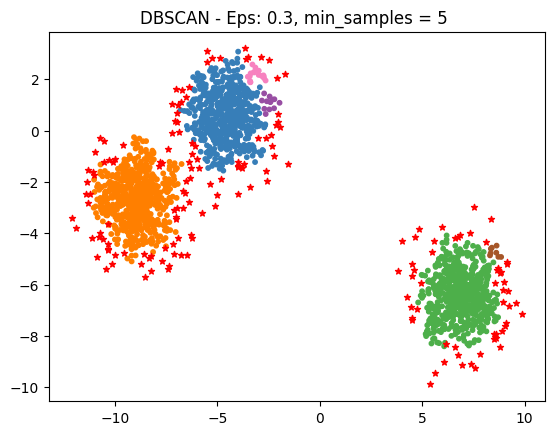

6 clusters encontrados.
170 outliers encontrados.


In [11]:
plota_dbscan(bolinhas, scale=False, eps = 0.3, min_samples = 5)

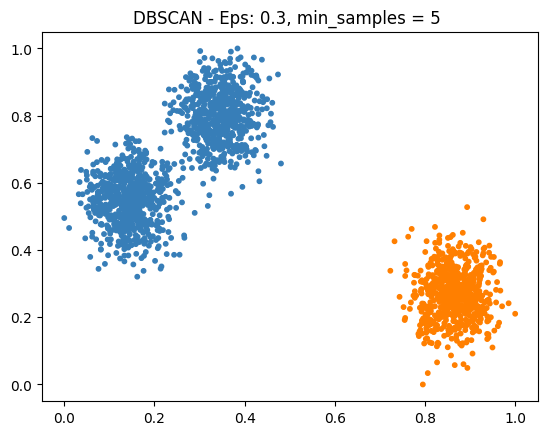

2 clusters encontrados.
0 outliers encontrados.


In [12]:
plota_dbscan(bolinhas, scale=True, eps = 0.3, min_samples = 5)

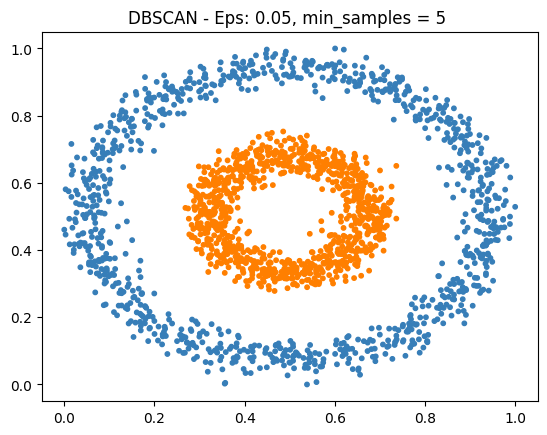

2 clusters encontrados.
0 outliers encontrados.


In [13]:
plota_dbscan(circulos, scale=True, eps = 0.05, min_samples = 5)

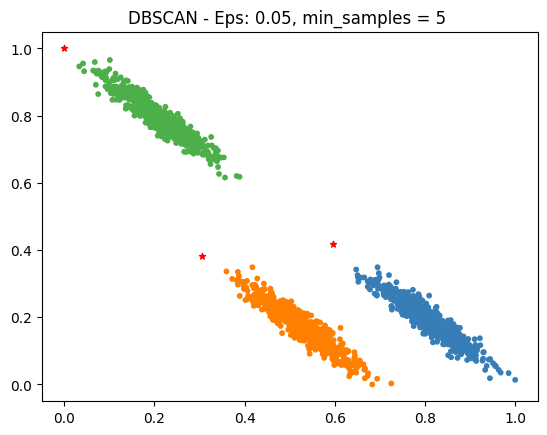

3 clusters encontrados.
3 outliers encontrados.


In [14]:
plota_dbscan(aniso, scale=True, eps = 0.05, min_samples = 5)

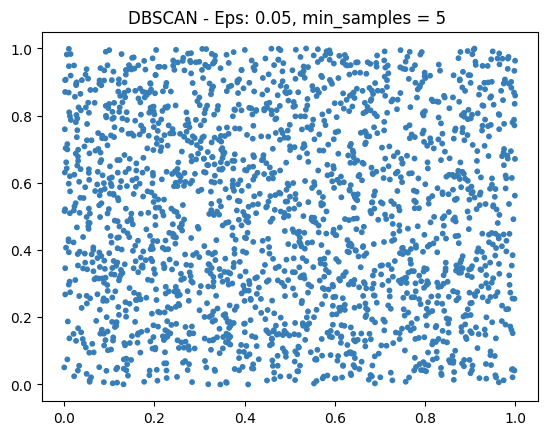

1 clusters encontrados.
0 outliers encontrados.


In [15]:
plota_dbscan(aleatorio, scale=True, eps = 0.05, min_samples = 5)

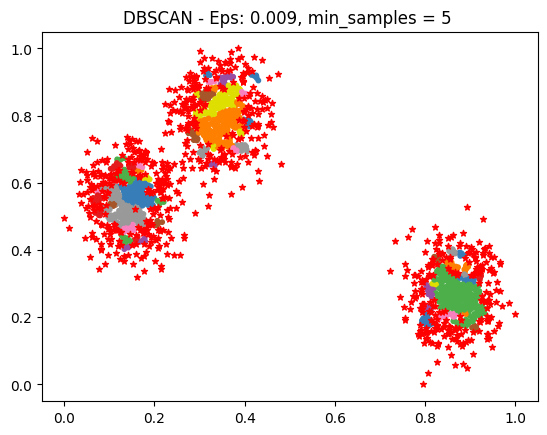

58 clusters encontrados.
705 outliers encontrados.


In [16]:
plota_dbscan(bolinhas, scale=True, eps = 0.009, min_samples = 5)

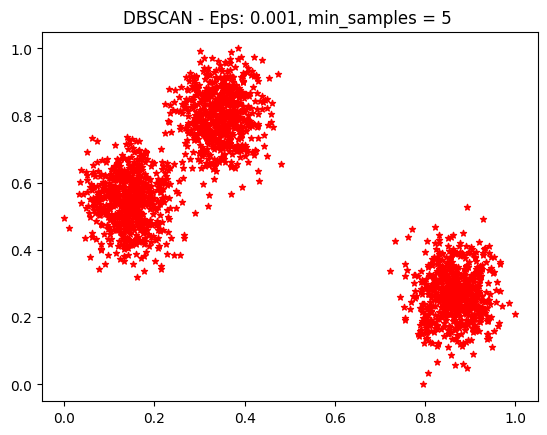

0 clusters encontrados.
2000 outliers encontrados.


In [17]:
plota_dbscan(bolinhas, scale=True, eps = 0.001, min_samples = 5)

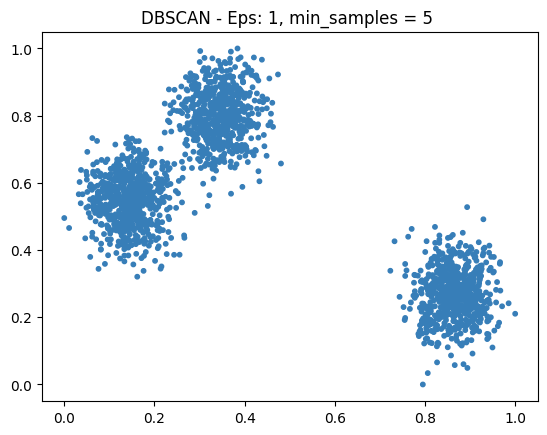

1 clusters encontrados.
0 outliers encontrados.


In [18]:
plota_dbscan(bolinhas, scale=True, eps = 1, min_samples = 5)

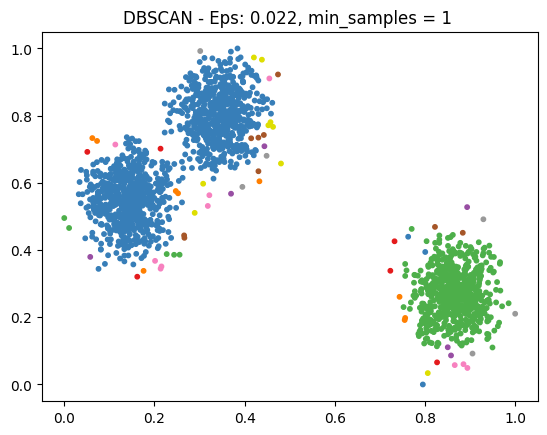

55 clusters encontrados.
0 outliers encontrados.


In [19]:
plota_dbscan(bolinhas, scale=True, eps = 0.022, min_samples = 1)

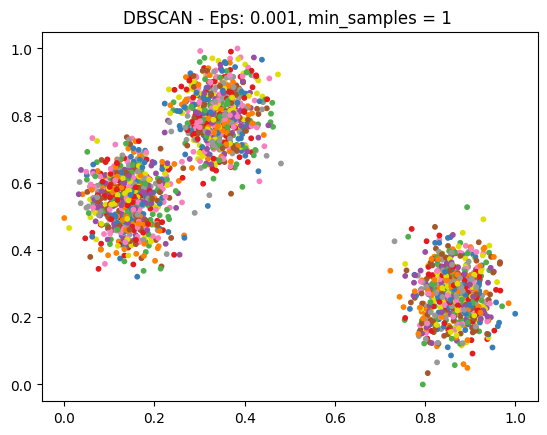

1955 clusters encontrados.
0 outliers encontrados.


In [20]:
plota_dbscan(bolinhas, scale=True, eps = 0.001, min_samples = 1)

In [21]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 4

nn = NearestNeighbors(n_neighbors=n_neighbors)
nn.fit(aniso)
distancias, indices = nn.kneighbors(aniso)

In [22]:
# Selecionar a quarta coluna da matriz de distâncias (distâncias ao quarto vizinho mais próximo)
distancias_quarto_vizinho = distancias[:, n_neighbors - 1]

# Ordenar as distâncias em ordem crescente
distancias_quarto_vizinho_ordenadas = np.sort(distancias_quarto_vizinho)

# Encontrar o menor valor de distância para o quarto vizinho mais próximo
menor_distancia_quarto_vizinho = distancias_quarto_vizinho_ordenadas[0]

print(f'O menor valor de distância encontrado para o quarto vizinho mais próximo é: {menor_distancia_quarto_vizinho}')

O menor valor de distância encontrado para o quarto vizinho mais próximo é: 0.011567420567692272


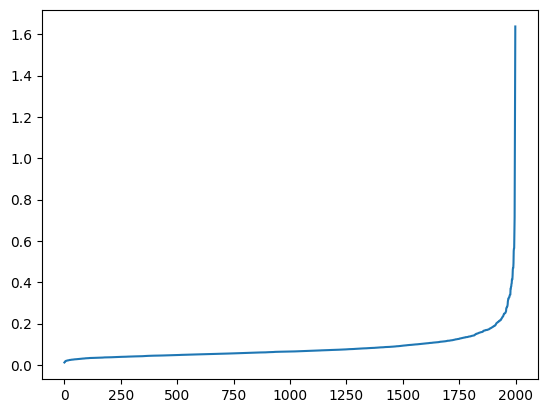

In [26]:
plt.plot(distancias_quarto_vizinho_ordenadas)

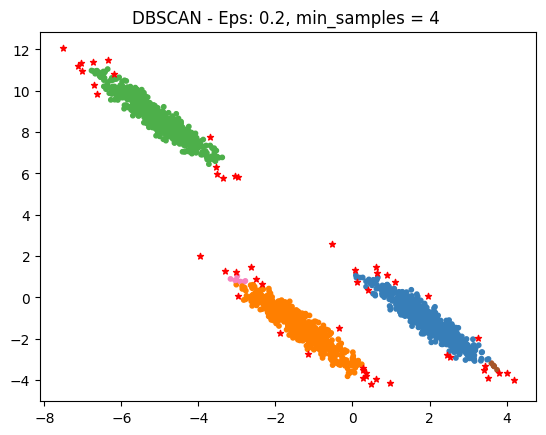

5 clusters encontrados.
51 outliers encontrados.


In [27]:
plota_dbscan(aniso, scale=False, eps = 0.2, min_samples = 4)

In [28]:
df_distancias = pd.DataFrame(distancias_quarto_vizinho_ordenadas, columns = ['distancias'])
df_distancias['distancia_shift'] = df_distancias.distancias.shift(-1)
df_distancias['delta'] = df_distancias.distancia_shift - df_distancias.distancias
df_distancias['delta'].max()

np.float64(0.347393833467444)

In [30]:
# Encontrar a linha que gera a maior diferença e extrair o valor de 'distancias' correspondente
eps_ideal = df_distancias.loc[df_distancias['delta'].idxmax(), 'distancias']

print(f'O valor aproximado de eps encontrado é: {eps_ideal}')

O valor aproximado de eps encontrado é: 1.0300406178287318


In [32]:
eps = df_distancias.loc[df_distancias['delta'].argmax(),'distancias']

print(f'O valor aproximado de eps encontrado é: {eps}')

O valor aproximado de eps encontrado é: 1.0300406178287318


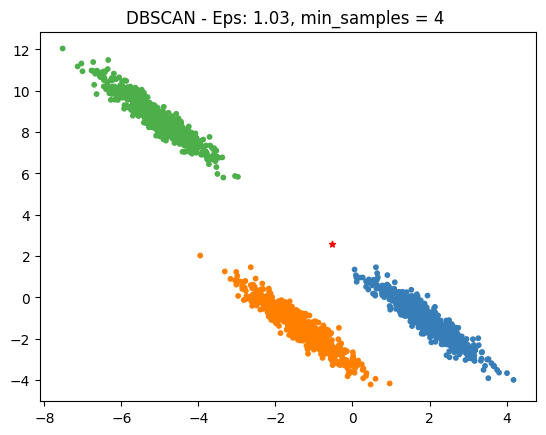

3 clusters encontrados.
1 outliers encontrados.


In [33]:
plota_dbscan(aniso, scale=False, eps = 1.03, min_samples = 4)

In [34]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

scaler = MinMaxScaler()

df_iris[:] = scaler.fit_transform(df_iris[:])

In [36]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 8

nn = NearestNeighbors(n_neighbors=n_neighbors)
nn.fit(df_iris)
distancias, indices = nn.kneighbors(df_iris)

In [37]:
# Selecionar a quarta coluna da matriz de distâncias (distâncias ao quarto vizinho mais próximo)
distancias_quarto_vizinho = distancias[:, n_neighbors - 1]

# Ordenar as distâncias em ordem crescente
distancias_quarto_vizinho_ordenadas = np.sort(distancias_quarto_vizinho)

# Encontrar o menor valor de distância para o quarto vizinho mais próximo
menor_distancia_quarto_vizinho = distancias_quarto_vizinho_ordenadas[0]

print(f'O menor valor de distância encontrado para o quarto vizinho mais próximo é: {menor_distancia_quarto_vizinho}')

O menor valor de distância encontrado para o quarto vizinho mais próximo é: 0.05286766328567343


In [38]:
df_distancias = pd.DataFrame(distancias_quarto_vizinho_ordenadas, columns = ['distancias'])
df_distancias['distancia_shift'] = df_distancias.distancias.shift(-1)
df_distancias['delta'] = df_distancias.distancia_shift - df_distancias.distancias
df_distancias['delta'].max()

np.float64(0.05128010147762874)

In [39]:
# Encontrar a linha que gera a maior diferença e extrair o valor de 'distancias' correspondente
eps_ideal = df_distancias.loc[df_distancias['delta'].idxmax(), 'distancias']

print(f'O valor aproximado de eps encontrado é: {eps_ideal}')

O valor aproximado de eps encontrado é: 0.3296682316503782


In [41]:
df_iris=np.array(df_iris)

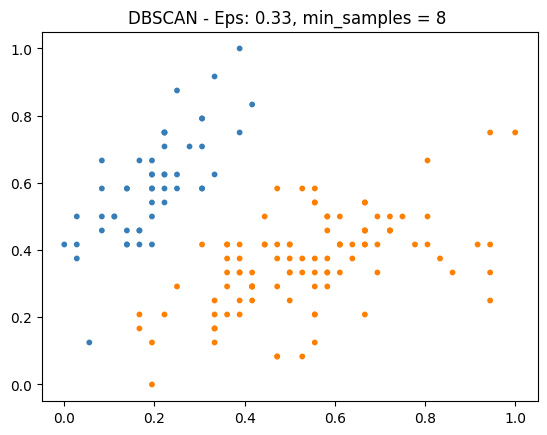

2 clusters encontrados.
0 outliers encontrados.


In [42]:
plota_dbscan(df_iris, scale=False, eps = 0.33, min_samples = 8)